<a href="https://colab.research.google.com/github/ElCastra/Klasifikasi-Gambar-Submission/blob/main/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Submission Dicoding Klasifikasi Gambar

Nama : Muhamad Brillian Anugrah <br/>
[Dicoding User Link](https://www.dicoding.com/users/el_castra/) <br/>
[Google Colab Link](https://colab.research.google.com/drive/1Hs-iPBi3kPzG3AFDxu3YtW2IDt-SdU2f#scrollTo=71GNNhF6qOEw)


In [ ]:
# Download dan mengekestrak Dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip
!unzip /tmp/rockpaperscissors.zip -d /tmp/

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Membuat direktori jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Membagi dataset menjadi train dan validation
for category in ['rock', 'paper', 'scissors']:
    category_dir = os.path.join(base_dir, category)
    train_category_dir = os.path.join(train_dir, category)
    validation_category_dir = os.path.join(validation_dir, category)

    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(validation_category_dir, exist_ok=True)

    images = os.listdir(category_dir)
    train_images, val_images = train_test_split(images, test_size=0.40)

    for file in train_images:
        shutil.copy(os.path.join(category_dir, file), os.path.join(train_category_dir, file))
    for file in val_images:
        shutil.copy(os.path.join(category_dir, file), os.path.join(validation_category_dir, file))


In [5]:
# Augmentasi Gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [6]:
# Model Sequential
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [7]:
# Tambahkan callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [8]:
# Mencegah Overfitting
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97):
            print(f"\nEpoch {epoch+1}: Stop ")
            self.model.stop_training = True

early_stopping = EarlyStoppingCallback()

model.save('model_before_training.keras')

# Melatih model menggunakan data pelatihan dan validasi yang ditentukan,
training_history = model.fit(
    train_generator,
    steps_per_epoch=41,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=27,
    verbose=2,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

model.save('model_after_training.keras')

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.67074, saving model to model-001.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 - 24s - loss: 0.9798 - accuracy: 0.5328 - val_loss: 0.6707 - val_accuracy: 0.7431 - lr: 0.0010 - 24s/epoch - 588ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.67074 to 0.20191, saving model to model-002.h5
41/41 - 20s - loss: 0.4031 - accuracy: 0.8559 - val_loss: 0.2019 - val_accuracy: 0.9387 - lr: 0.0010 - 20s/epoch - 482ms/step
Epoch 3/20

Epoch 3: val_loss did not improve from 0.20191
41/41 - 16s - loss: 0.2078 - accuracy: 0.9428 - val_loss: 0.2137 - val_accuracy: 0.9271 - lr: 0.0010 - 16s/epoch - 387ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.20191 to 0.12534, saving model to model-004.h5
41/41 - 20s - loss: 0.1426 - accuracy: 0.9566 - val_loss: 0.1253 - val_accuracy: 0.9514 - lr: 0.0010 - 20s/epoch - 479ms/step
Epoch 5/20

Epoch 5: val_loss improved from 0.12534 to 0.12193, saving model to model-005.h5
41/41 - 20s - loss: 0.1364 - accuracy: 0.9527 - val_loss: 0.1219 - val_accuracy: 0.9583 - lr: 0.0010 - 20s/epoch - 498ms/step
Epoch 6/20

Epoch 6: val_loss im

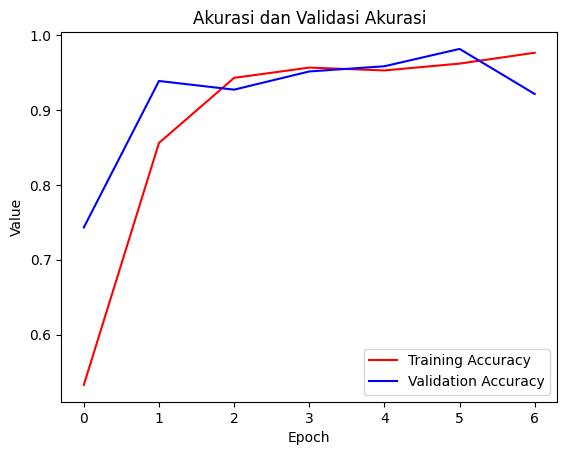

In [9]:
import matplotlib.pyplot as plt

# Membuat grafik akurasi pelatihan (Training Accuracy) dan akurasi validasi (Validation Accuracy)
plt.plot(training_history.history['accuracy'], 'r', label='Training Accuracy')   # Kurva akurasi pelatihan (warna merah)
plt.plot(training_history.history['val_accuracy'], 'b', label='Validation Accuracy')  # Kurva akurasi validasi (warna biru)

plt.title('Akurasi dan Validasi Akurasi')  # Menambahkan judul grafik
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

plt.show()

Saving WhatsApp Image 2024-03-22 at 10.48.32 AM.jpeg to WhatsApp Image 2024-03-22 at 10.48.32 AM.jpeg
1/1 [==============================] - 0s 359ms/step
WhatsApp Image 2024-03-22 at 10.48.32 AM.jpeg
Ini adalah gambar Kertas


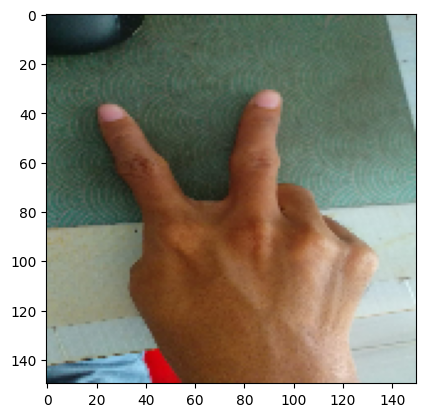

In [10]:
# Uji Model
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0, 0] != 0:
        print('Ini adalah gambar Kertas')
    elif classes[0, 1] != 0:
        print('Ini adalah gambar Batu')
    else:
        print('Ini adalah gambar Gunting')
